# Fast Propagation Wave Propagation Method (FPWPM)

## XZ

In [1]:
from diffractio import np, plt
from diffractio import degrees, um
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

from diffractio.vector_fields_XZ import Vector_field_XZ

In [2]:
from py_pol.jones_vector import Jones_vector

16.0


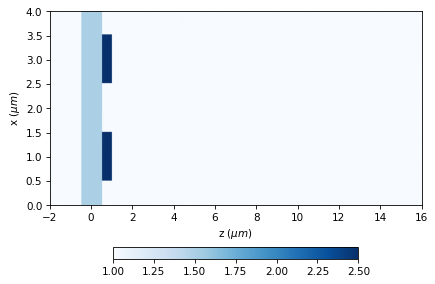

In [3]:
scale='auto'

period = 2*um
wavelength = .5 * um
z_talbot = 2*period**2/wavelength
print(z_talbot)

x0 = np.linspace(- 0, 2*period, 1024)
z0 = np.linspace(-2 * um, 1*z_talbot, 1024)

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(theta = 0*degrees)

u_xz = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u_xz.incident_field(u0)

u_xz.ronchi_grating(r0=(0*um, 0*um), period=period, fill_factor=0.5, 
                    height = 1*wavelength, refractive_index=1.5+2j, length = 32*wavelength, Dx = 0, 
                    heigth_substrate = 1*um,
                    refractive_index_substrate=1.5, angle=0)

u_xz.draw_refractive_index(scale=scale, draw_borders=False, colorbar_kind='horizontal')


In [4]:

j0 = Jones_vector().general_azimuth_ellipticity(azimuth=45*degrees, ellipticity=0*degrees)
print(j0)


E = 
[+0.707]   
[+0.707]   



In [5]:
EH_xz = Vector_field_XZ(x0,z0, wavelength)
EH_xz.refractive_index_from_scalarXZ(u_xz)
EH_xz.incident_field(u0=u0, j0=j0)

In [6]:
EH_xz.FP_WPM(has_edges=False, verbose=False)

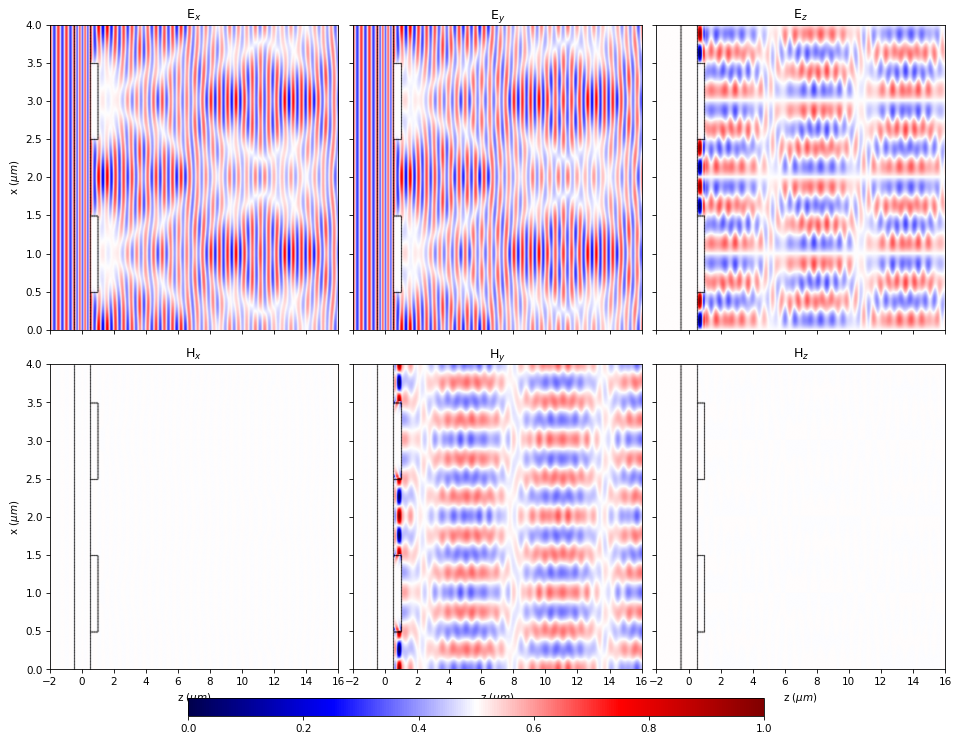

In [7]:
EH_xz.draw('EH', logarithm=False, scale=scale, color='k.')

## XYZ


In [8]:
from diffractio import um, degrees, np
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_fields_XYZ import Vector_field_XYZ

from py_pol.jones_vector import Jones_vector

In [9]:
length = 10 * um
x0 = np.linspace(-length / 2, length / 2, 250)
y0 = np.linspace(-length / 2, length / 2, 250)
z0 = np.linspace(0 * um, 12 * um, 250)
wavelength = 0.6328 * um

Exyz = Vector_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)

In [10]:
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.plane_wave()

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(r0=(0 * um, 0 * um), radius=(3 * um, 3 * um))
u2 = u1 * t1


j0 = Jones_vector()
j0.general_azimuth_ellipticity(azimuth=0 * degrees, ellipticity=0 * degrees)

Exyz.incident_field(u0=u2, j0=j0)

In [11]:
uxyz = Scalar_mask_XYZ(x0, y0, z0, wavelength)
uxyz.sphere(
    r0=(0 * um, 0 * um, 5 * um),
    radius=(4 * um, 4 * um, 4 * um),
    refractive_index=1.5,
    rotation=None,
)

Exyz.refractive_index_from_scalarXYZ(uxyz)

In [12]:
Exyz.FP_WPM(has_edges=True, verbose=True)

Time = 15.92 s, time/loop = 63.69 ms


3D drawings are not available yet.

## Pass to XZ or YZ plane

For a simple visualization, the XYZ vector field can be converted to a XZ or YZ plane. This is done by the methods to_Vector_field_XZ or to_Vector_field_YZ.

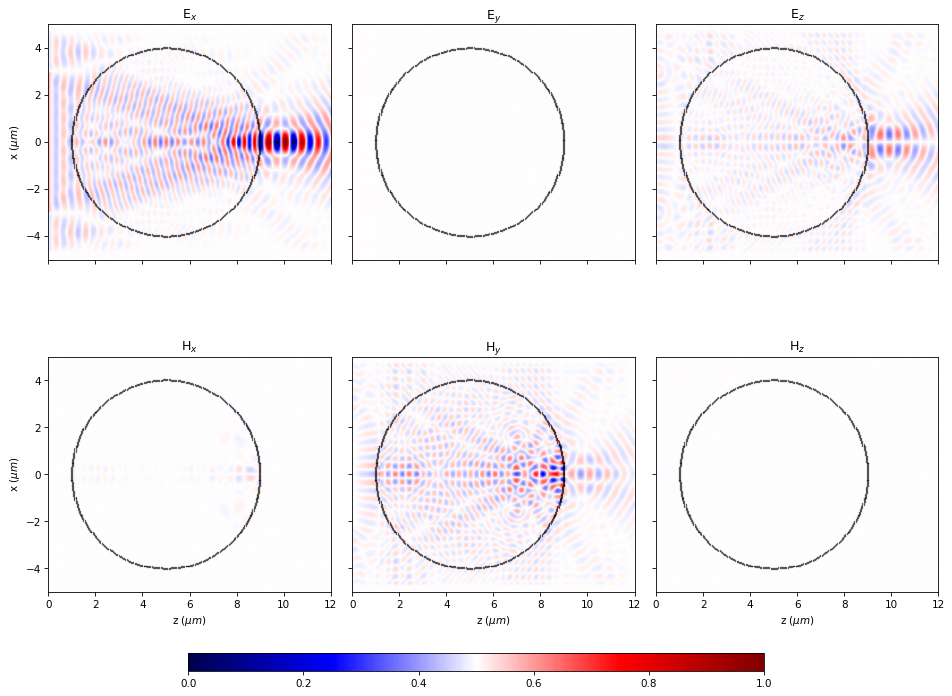

In [13]:
Exz = Exyz.to_Vector_field_XZ(y0=0 * um)
edges = Exz.surface_detection(min_incr=0.1, has_draw=False)
Exz.borders = edges

Exz.draw("EH", draw_borders=True, color="k.", ms=0.5)

In [14]:
Exyz.size(verbose=True)
Exz.size(verbose=True)

size = 1.98 Gbytes
size = 7.64 Mbytes
